<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/RNC_Kaggle_PrecioVivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parte 1**
Usar  Tensorflow Playground para responder las siguientes preguntas respecto de las redes neuronales. El objetivo de este ejercicios es entender de mejor forma cómo funcionan las redes neuronales a nivel conceptual.

Asegúrate de revisar que your playground  está montada como la imagen a continuación, con 2 variables: una capa oculta con 1 neurona y los datos circulares. Deberías obtener una tasa de aprendizaje de 0,01, una función de activación linear, sin regularización.
Solución 
1.	Cuando se trabaja con una sola capa es muy difícil clasificar de forma correcta.
2.	sin embargo a medida que vamos incrementando las capas  va mejorando 
3.	2 capas y 3 redes neuronales
4.  Tasa de aprendizaje igual a 0.03

Parte 2 **texto en negrita**
Ahora, pon las redes neuronales en acción. Se te pide construir una red neuronal usando los datos de los concursos de Kaggle que prefieras en Week 10's Gradient Boosting Exercise Aquí, se te pidió competir en el concurso de Kaggle usando una método de potenciación del gradiente. Ahora, compite en el concurso que elijas usando una red neuronal. ¿Obtienes mejores o peores puntajes?

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
# Imports
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


In [171]:
# Obtener datos
df=pd.read_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/train.csv')


In [172]:
df.shape

(1460, 81)

In [173]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [174]:
df=df.drop(df.index[[0]])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1200 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [176]:
df.shape

(1459, 81)

In [177]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [178]:
df1=df.drop(columns=['Alley','PoolQC','Fence','MiscFeature','LotFrontage'])
df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [179]:
df1.shape
df1

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [180]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [181]:
df1=df1[['TotalBsmtSF','YearBuilt','1stFlrSF','GrLivArea','FullBath','GarageCars','GarageArea','TotRmsAbvGrd','SalePrice']]
df1

,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd,SalePrice
1,1262,1976,1262,1262,2,2,460,6,181500
2,920,2001,920,1786,2,2,608,6,223500
3,756,1915,961,1717,1,3,642,7,140000
4,1145,2000,1145,2198,2,3,836,9,250000
5,796,1993,796,1362,1,2,480,5,143000
...,...,...,...,...,...,...,...,...,...
1455,953,1999,953,1647,2,2,460,7,175000
1456,1542,1978,2073,2073,2,2,500,7,210000
1457,1152,1941,1188,2340,2,1,252,9,266500
1458,1078,1950,1078,1078,1,1,240,5,142125


In [182]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   TotalBsmtSF   1459 non-null   int64
 1   YearBuilt     1459 non-null   int64
 2   1stFlrSF      1459 non-null   int64
 3   GrLivArea     1459 non-null   int64
 4   FullBath      1459 non-null   int64
 5   GarageCars    1459 non-null   int64
 6   GarageArea    1459 non-null   int64
 7   TotRmsAbvGrd  1459 non-null   int64
 8   SalePrice     1459 non-null   int64
dtypes: int64(9)
memory usage: 114.0 KB


In [183]:
df1.shape

(1459, 9)

**Modelo de regresion lineal **

In [184]:
# entrenando
X_train=df1.drop(columns='SalePrice')
X_train

,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
1,1262,1976,1262,1262,2,2,460,6
2,920,2001,920,1786,2,2,608,6
3,756,1915,961,1717,1,3,642,7
4,1145,2000,1145,2198,2,3,836,9
5,796,1993,796,1362,1,2,480,5
...,...,...,...,...,...,...,...,...
1455,953,1999,953,1647,2,2,460,7
1456,1542,1978,2073,2073,2,2,500,7
1457,1152,1941,1188,2340,2,1,252,9
1458,1078,1950,1078,1078,1,1,240,5


In [185]:
y_train=df1['SalePrice']
y_train

1       181500
2       223500
3       140000
4       250000
5       143000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

In [186]:
X_train,X_test, y_train, y_test,=train_test_split(X_train,y_train, random_state=3)

In [187]:
from sklearn.linear_model import LinearRegression


In [188]:
lr = LinearRegression()

In [189]:
lr.fit(X_train,y_train)

LinearRegression()

In [190]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.7794595542261409
0.47821950188444706


# Predecir

In [191]:
# Obtener datos de test
test=pd.read_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/test.csv')
test


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [192]:
#Prueba del modelo

In [193]:
X_test[['TotalBsmtSF','YearBuilt','1stFlrSF','GrLivArea','FullBath','GarageCars','GarageArea','TotRmsAbvGrd']]
X_test

,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
141,1734,2005,1734,1734,2,2,660,7
950,864,1950,864,864,1,2,720,5
249,1444,1958,1444,2144,2,2,389,7
738,1200,1987,1200,1200,3,0,0,5
569,943,1979,943,943,1,2,600,4
...,...,...,...,...,...,...,...,...
1345,960,1920,960,960,1,1,308,5
1142,1466,2006,1466,2828,3,3,1052,11
1012,602,1923,900,1502,1,1,180,7
315,716,2004,716,1432,2,2,432,6


In [194]:
X_test.shape

(365, 8)

In [195]:
# Vemos los nulos
X_test.isnull().sum()

TotalBsmtSF     0
YearBuilt       0
1stFlrSF        0
GrLivArea       0
FullBath        0
GarageCars      0
GarageArea      0
TotRmsAbvGrd    0
dtype: int64

In [196]:
#Completamos los nulos
X_test['TotalBsmtSF'].fillna((X_test['TotalBsmtSF'].mean()), inplace=True)
X_test['GarageCars'].fillna((X_test['GarageCars'].mean()), inplace=True)
X_test['GarageArea'].fillna((X_test['GarageArea'].mean()), inplace=True)

Predecimos el modelo

In [197]:
y_predictions=lr.predict(X_test)
y_predictions

array([261078.11167147, 117748.17835475, 246183.67335869, 131148.89126061,
       148566.50581422, 214709.01996424, 160643.82844283,  76878.75525714,
       401056.57323728,  92119.59751744, 241073.35500212, 277258.34001177,
       204612.34517235, 250588.68603107, 171763.9317479 , 177319.91286935,
        62293.77180722, 119272.18669978, 156743.89887164, 152533.73196351,
       108710.55993198, 160751.10104651, 204715.45086537, 188422.94139138,
       303693.87268632, 313229.56309274, 109302.25698864, 114329.96430389,
       174122.0243239 , 203591.3108089 , 168930.88467281,  61852.83970455,
       120399.47569353, 133130.43577569, 171536.81757088, 106956.28643098,
       198932.36162724, 177022.3870264 , 142115.23287573, 114114.46947166,
       218623.52219605, 207051.00904011, 162449.67390399, 152047.49918947,
       180577.46728473, 156645.8308451 , 106328.11762964, 111707.30638775,
       122022.96478075, 205700.38351155, 216115.07657389, 149644.35551435,
       124290.81074177, 1

In [198]:
y_predictions.shape

(365,)

In [199]:
test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [200]:
pd.Series(y_predictions) # predictions

0      261078.111671
1      117748.178355
2      246183.673359
3      131148.891261
4      148566.505814
           ...      
360     89828.236815
361    346276.283683
362    112098.697333
363    175328.409922
364    231815.817561
Length: 365, dtype: float64

In [201]:
y_predictions=pd.Series(y_predictions)
y_predictions.index=y_test.index
y_predictions

141     261078.111671
950     117748.178355
249     246183.673359
738     131148.891261
569     148566.505814
            ...      
1345     89828.236815
1142    346276.283683
1012    112098.697333
315     175328.409922
597     231815.817561
Length: 365, dtype: float64

In [202]:
to_submit=pd.DataFrame({'Id':test.loc[y_test.index,'Id'],'SalePrice':y_predictions})
to_submit.head()


,Id,SalePrice
141,1602,261078.111671
950,2411,117748.178355
249,1710,246183.673359
738,2199,131148.891261
569,2030,148566.505814


In [203]:
to_submit.to_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/submission.csv',index=False)

Modelo XGBoots

In [204]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [205]:
print('Training accuracy:', xgb.score(X_train, y_train))
print('Testing accuracy:', xgb.score(X_test, y_test))

Training accuracy: 0.6709323583180987
Testing accuracy: 0.010958904109589041


In [206]:
X_train.head()

,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
955,979,1946,979,1958,2,2,492,8
912,768,1925,1015,1015,1,1,450,6
904,876,1967,902,902,1,1,288,6
746,952,2000,980,2256,2,2,554,8
478,1705,2007,1718,1718,2,3,826,7


In [207]:
X_train.shape

(1094, 8)

In [208]:
y_train

955     145000
912      88000
904     125500
746     236000
478     297000
         ...  
790     160200
257     220000
969     140000
953     172000
1274    139000
Name: SalePrice, Length: 1094, dtype: int64

In [209]:
y_train.shape

(1094,)

Entrenamiento y prueba del modelo
X-test y_test

In [210]:
X_test

,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
141,1734,2005,1734,1734,2,2,660,7
950,864,1950,864,864,1,2,720,5
249,1444,1958,1444,2144,2,2,389,7
738,1200,1987,1200,1200,3,0,0,5
569,943,1979,943,943,1,2,600,4
...,...,...,...,...,...,...,...,...
1345,960,1920,960,960,1,1,308,5
1142,1466,2006,1466,2828,3,3,1052,11
1012,602,1923,900,1502,1,1,180,7
315,716,2004,716,1432,2,2,432,6


In [211]:
X_test.shape

(365, 8)

y_test

In [212]:
y_testXGB=xgb.predict(X_test)
pd.Series(y_testXGB,index=X_test.index)


141     220000
950     120500
249     190000
738     118000
569     156000
         ...  
1345     67000
1142    320000
1012     98000
315     178000
597     158000
Length: 365, dtype: int64

In [213]:
y_predictionsXGB=pd.Series(y_testXGB,index=X_test.index)
y_predictionsXGB

141     220000
950     120500
249     190000
738     118000
569     156000
         ...  
1345     67000
1142    320000
1012     98000
315     178000
597     158000
Length: 365, dtype: int64

In [214]:
y_test.shape

(365,)

Puntuamos el modelo a traves de nuestra base de entrenamiento

In [215]:
xgb.score(X_train, y_train)

0.6709323583180987

Guardar para presentar a Kaggle

In [216]:
to_submitXGB=pd.DataFrame({'Id':test.loc[y_predictionsXGB.index,'Id'],'SalePrice':y_predictionsXGB})
to_submitXGB.head()



,Id,SalePrice
141,1602,220000
950,2411,120500
249,1710,190000
738,2199,118000
569,2030,156000


In [255]:
to_submit.to_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/submissionXGB.csv',index=False)

# Modelo RNC Detención anticipada

In [218]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical



In [219]:
X_train.head()


,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
955,979,1946,979,1958,2,2,492,8
912,768,1925,1015,1015,1,1,450,6
904,876,1967,902,902,1,1,288,6
746,952,2000,980,2256,2,2,554,8
478,1705,2007,1718,1718,2,3,826,7


In [220]:
X_train.shape

(1094, 8)

In [221]:
X_test

,TotalBsmtSF,YearBuilt,1stFlrSF,GrLivArea,FullBath,GarageCars,GarageArea,TotRmsAbvGrd
141,1734,2005,1734,1734,2,2,660,7
950,864,1950,864,864,1,2,720,5
249,1444,1958,1444,2144,2,2,389,7
738,1200,1987,1200,1200,3,0,0,5
569,943,1979,943,943,1,2,600,4
...,...,...,...,...,...,...,...,...
1345,960,1920,960,960,1,1,308,5
1142,1466,2006,1466,2828,3,3,1052,11
1012,602,1923,900,1502,1,1,180,7
315,716,2004,716,1432,2,2,432,6


In [222]:
X_test.shape

(365, 8)

In [223]:
y_train.head()

955    145000
912     88000
904    125500
746    236000
478    297000
Name: SalePrice, dtype: int64

Preprocesamiento de datos

In [224]:
# Escalar nuestros datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Red Neuronal

In [225]:
#Crea una red neuronal prealimentada

# Paso 1: Definir nuestra estructura de red
# Guardar la cantidad de características que tenemos como nuestra forma de entrada
input_shape = X_train.shape[1]
input_shape

8

In [226]:
# Paso 2 Compilamos Modelo Con detención anticipada
# Modelo secuencial
model = Sequential()

In [227]:

# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
#Segunda capa
model.add(Dense(10, 
                activation = 'relu'))
#Capa de salida
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
early_stopping = EarlyStopping(patience = 5)
# Paso 3 Entrenamos el modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100,
                    callbacks = [early_stopping])

Epoch 1/100
35/35 [==============================] - 1s 7ms/step - loss: -71902.0469 - val_loss: -158550.5938
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: -246798.0156 - val_loss: -388839.5938
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: -534354.8750 - val_loss: -769780.3125
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: -1023945.8125 - val_loss: -1434703.3750
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: -1834677.2500 - val_loss: -2490548.0000
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: -3148112.2500 - val_loss: -4108785.0000
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: -5125847.5000 - val_loss: -6601637.0000
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: -8009299.5000 - val_loss: -10085398.0000
Epoch 9/100
35/35 [==============================] - 0s 4ms/step - loss: -11978753.0000 - val_loss: -1

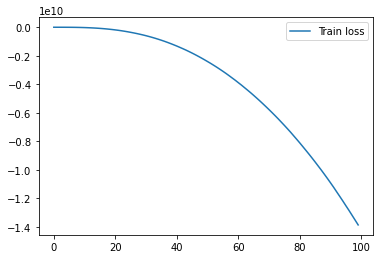

In [228]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

In [229]:
# Sin detención anticipada
# Modelo secuencial
model = Sequential()
# Primera capa oculta
model.add(Dense(19, # Cuántas neuronas tienes en tu primera capa oculta
                input_dim = input_shape, # ¿Cuál es la forma de tus características de entrada (número de columnas)?
                activation = 'relu')) # ¿Qué función de activación estás usando?
model.add(Dense(10, 
                activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 8ms/step - loss: -125257.3281 - val_loss: -208693.8594
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: -298145.3125 - val_loss: -429713.1875
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: -577253.2500 - val_loss: -813844.0625
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: -1066753.7500 - val_loss: -1471990.0000
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: -1881827.5000 - val_loss: -2566382.0000
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: -3228256.5000 - val_loss: -4261065.5000
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: -5230831.0000 - val_loss: -6772186.0000
Epoch 8/100
35/35 [==============================] - 0s 4ms/step - loss: -8100407.0000 - val_loss: -10202197.0000
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: -11933089.0000 - val_loss: -

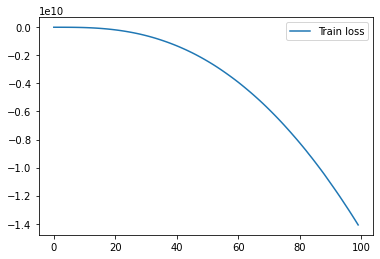

In [230]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.legend();

In [256]:
test['Id']

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [257]:
y_test

141     260000
950     129000
249     277000
738     179000
569     135960
         ...  
1345    108500
1142    424870
1012    165000
315     188500
597     194201
Name: SalePrice, Length: 365, dtype: int64

Realizamos predicciones

In [258]:
y_predictions.shape

(365,)

In [259]:
y_predictions

141     261078.111671
950     117748.178355
249     246183.673359
738     131148.891261
569     148566.505814
            ...      
1345     89828.236815
1142    346276.283683
1012    112098.697333
315     175328.409922
597     231815.817561
Length: 365, dtype: float64

In [260]:
pd.Series(y_predictions)

141     261078.111671
950     117748.178355
249     246183.673359
738     131148.891261
569     148566.505814
            ...      
1345     89828.236815
1142    346276.283683
1012    112098.697333
315     175328.409922
597     231815.817561
Length: 365, dtype: float64

In [261]:
predictions_RNC=pd.Series(y_predictions)
predictions_RNC.index=y_test.index
predictions_RNC

141     261078.111671
950     117748.178355
249     246183.673359
738     131148.891261
569     148566.505814
            ...      
1345     89828.236815
1142    346276.283683
1012    112098.697333
315     175328.409922
597     231815.817561
Length: 365, dtype: float64

In [262]:
to_submitRNC=pd.DataFrame({'Id':test.loc[y_test.index,'Id'],'SalePrice':predictions_RNC})
to_submitRNC.head()

,Id,SalePrice
141,1602,261078.111671
950,2411,117748.178355
249,1710,246183.673359
738,2199,131148.891261
569,2030,148566.505814


In [263]:
to_submit.to_csv('/content/drive/MyDrive/ PTCienciaDeDatos/PandasParaManipulaciónDeDatos/submissionRNC.csv',index=False)

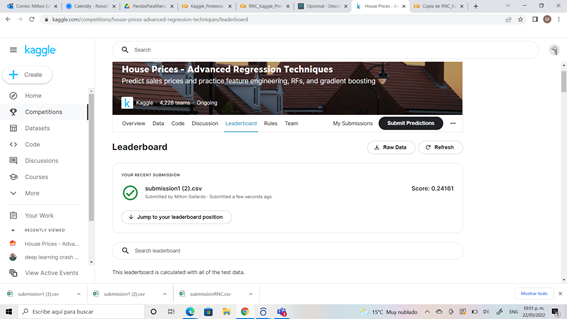